# Without Model consideration, just generated images analysis FID

### 2322R vs 100F - Calculating FID with 2322 images from samlet greyscale and 100 images from samlet generated both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R and "/content/drive/MyDrive/Public/samlet_generated_100_256" for F

In [ ]:
!pip install -q torch-fidelity

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    # image_files = image_files[:100]  # Limit to the first 100 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 338MB/s]
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpmb1pxydg" with extensions png,jpg,jpeg
Found 2322 samples
/usr/local/lib/python3.10/dist-packages/torch_fidelity/datasets.py:16: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes())).view(height, width, 3)
Processing samples
Extracting statistics from input 2
Looking for samples non-rec

FID Score: 293.95737715124886


### 100R vs 100F - Calculating FID with 100 images from samlet greyscale and 100 images from samlet generated both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R and "/content/drive/MyDrive/Public/samlet_generated_100_256" for F

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    image_files = image_files[:100]  # Limit to the first 100 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpgierc9gz" with extensions png,jpg,jpeg
Found 100 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpz8_hgh9k" with extensions png,jpg,jpeg
Found 100 samples
Processing samples


FID Score: 307.6056675425426


Frechet Inception Distance: 307.6056675425426


### 100R vs another 100R - Calculating FID with 100 images from samlet greyscale and 100 images from samlet greyscale both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R

In [ ]:
import torch
from torchvision.utils import save_image
import os
import random
random.seed(10)
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load a specific number of random images from a directory
def load_random_images(directory_path, num_images=100, target_size=(256, 256), exclude_files=None):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format

    if exclude_files:
        image_files = list(set(image_files) - set(exclude_files))  # Remove excluded files from the pool

    selected_files = random.sample(image_files, num_images)  # Randomly sample images
    images = []

    for filename in selected_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images), selected_files  # Return images and the list of selected file names

def calculate_fid_same_dir(directory, num_images=100):
    # Load the first subset of images
    subset1, subset1_files = load_random_images(directory, num_images=num_images)
    # Load the second subset, ensuring no overlap with subset1
    subset2, _ = load_random_images(directory, num_images=num_images, exclude_files=subset1_files)

    # Prepare images by normalizing and converting to PyTorch tensors
    subset1_tensor = prepare_images(subset1)
    subset2_tensor = prepare_images(subset2)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as subset1_dir, tempfile.TemporaryDirectory() as subset2_dir:
        # Save subset1 images to temporary directory
        for i, img in enumerate(subset1_tensor):
            save_image(img, os.path.join(subset1_dir, f"subset1_{i:05d}.png"))
        # Save subset2 images to temporary directory
        for i, img in enumerate(subset2_tensor):
            save_image(img, os.path.join(subset2_dir, f"subset2_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=subset1_dir,
            input2=subset2_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
fid_score = calculate_fid_same_dir(dir1)
print(f"FID Score (100 vs 100 from the same directory, no overlap): {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpgf3gfhjk" with extensions png,jpg,jpeg
Found 100 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpajl01981" with extensions png,jpg,jpeg
Found 100 samples
Processing samples


FID Score (100 vs 100 from the same directory, no overlap): 87.45229848410236


Frechet Inception Distance: 87.45229848410236


### 200R vs another 200R - Calculating FID with 200 images from samlet greyscale and 200 images from samlet greyscale both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R

In [ ]:
import torch
from torchvision.utils import save_image
import os
import random
random.seed(10)
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load a specific number of random images from a directory
def load_random_images(directory_path, num_images=100, target_size=(256, 256), exclude_files=None):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format

    if exclude_files:
        image_files = list(set(image_files) - set(exclude_files))  # Remove excluded files from the pool

    selected_files = random.sample(image_files, num_images)  # Randomly sample images
    images = []

    for filename in selected_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images), selected_files  # Return images and the list of selected file names

def calculate_fid_same_dir(directory, num_images=200):
    # Load the first subset of images
    subset1, subset1_files = load_random_images(directory, num_images=num_images)
    # Load the second subset, ensuring no overlap with subset1
    subset2, _ = load_random_images(directory, num_images=num_images, exclude_files=subset1_files)

    # Prepare images by normalizing and converting to PyTorch tensors
    subset1_tensor = prepare_images(subset1)
    subset2_tensor = prepare_images(subset2)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as subset1_dir, tempfile.TemporaryDirectory() as subset2_dir:
        # Save subset1 images to temporary directory
        for i, img in enumerate(subset1_tensor):
            save_image(img, os.path.join(subset1_dir, f"subset1_{i:05d}.png"))
        # Save subset2 images to temporary directory
        for i, img in enumerate(subset2_tensor):
            save_image(img, os.path.join(subset2_dir, f"subset2_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=subset1_dir,
            input2=subset2_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
fid_score = calculate_fid_same_dir(dir1)
print(f"FID Score (200 vs 200 from the same directory, no overlap): {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpvujq8k97" with extensions png,jpg,jpeg
Found 200 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpyj3tmw_u" with extensions png,jpg,jpeg
Found 200 samples
Processing samples


FID Score (200 vs 200 from the same directory, no overlap): 63.68282398143913


Frechet Inception Distance: 63.68282398143913


### 1000R vs another 1000R - Calculating FID with 1000 images from samlet greyscale and 1000 images from samlet greyscale both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R

In [ ]:
import torch
from torchvision.utils import save_image
import os
import random
random.seed(10)
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load a specific number of random images from a directory
def load_random_images(directory_path, num_images=100, target_size=(256, 256), exclude_files=None):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format

    if exclude_files:
        image_files = list(set(image_files) - set(exclude_files))  # Remove excluded files from the pool

    selected_files = random.sample(image_files, num_images)  # Randomly sample images
    images = []

    for filename in selected_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images), selected_files  # Return images and the list of selected file names

def calculate_fid_same_dir(directory, num_images=1000):
    # Load the first subset of images
    subset1, subset1_files = load_random_images(directory, num_images=num_images)
    # Load the second subset, ensuring no overlap with subset1
    subset2, _ = load_random_images(directory, num_images=num_images, exclude_files=subset1_files)

    # Prepare images by normalizing and converting to PyTorch tensors
    subset1_tensor = prepare_images(subset1)
    subset2_tensor = prepare_images(subset2)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as subset1_dir, tempfile.TemporaryDirectory() as subset2_dir:
        # Save subset1 images to temporary directory
        for i, img in enumerate(subset1_tensor):
            save_image(img, os.path.join(subset1_dir, f"subset1_{i:05d}.png"))
        # Save subset2 images to temporary directory
        for i, img in enumerate(subset2_tensor):
            save_image(img, os.path.join(subset2_dir, f"subset2_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=subset1_dir,
            input2=subset2_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
fid_score = calculate_fid_same_dir(dir1)
print(f"FID Score (1000 vs 1000 from the same directory, no overlap): {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmplaliegq9" with extensions png,jpg,jpeg
Found 1000 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpg7166bfe" with extensions png,jpg,jpeg
Found 1000 samples
Processing samples
Frechet Inception Distance: 20.369562522884337


FID Score (1000 vs 1000 from the same directory, no overlap): 20.369562522884337


### 1161R vs another 1161R - Calculating FID with 1161 images from samlet greyscale and 1161 images from samlet greyscale both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R

In [ ]:
import torch
from torchvision.utils import save_image
import os
import random
random.seed(10)
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load a specific number of random images from a directory
def load_random_images(directory_path, num_images=100, target_size=(256, 256), exclude_files=None):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format

    if exclude_files:
        image_files = list(set(image_files) - set(exclude_files))  # Remove excluded files from the pool

    selected_files = random.sample(image_files, num_images)  # Randomly sample images
    images = []

    for filename in selected_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images), selected_files  # Return images and the list of selected file names

def calculate_fid_same_dir(directory, num_images=1161):
    # Load the first subset of images
    subset1, subset1_files = load_random_images(directory, num_images=num_images)
    # Load the second subset, ensuring no overlap with subset1
    subset2, _ = load_random_images(directory, num_images=num_images, exclude_files=subset1_files)

    # Prepare images by normalizing and converting to PyTorch tensors
    subset1_tensor = prepare_images(subset1)
    subset2_tensor = prepare_images(subset2)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as subset1_dir, tempfile.TemporaryDirectory() as subset2_dir:
        # Save subset1 images to temporary directory
        for i, img in enumerate(subset1_tensor):
            save_image(img, os.path.join(subset1_dir, f"subset1_{i:05d}.png"))
        # Save subset2 images to temporary directory
        for i, img in enumerate(subset2_tensor):
            save_image(img, os.path.join(subset2_dir, f"subset2_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=subset1_dir,
            input2=subset2_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
fid_score = calculate_fid_same_dir(dir1)
print(f"FID Score (1161 vs 1161 from the same directory, no overlap): {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpqfa4idzf" with extensions png,jpg,jpeg
Found 1161 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpprmr5uuu" with extensions png,jpg,jpeg
Found 1161 samples
Processing samples
Frechet Inception Distance: 18.446443837246193


FID Score (1161 vs 1161 from the same directory, no overlap): 18.446443837246193


### 200R vs another 2000R - Calculating FID with 200 images from samlet greyscale and 2000 images from samlet greyscale both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R

In [ ]:
import torch
from torchvision.utils import save_image
import os
import random
random.seed(10)
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load a specific number of random images from a directory
def load_random_images(directory_path, num_images, target_size=(256, 256), exclude_files=None):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format

    if exclude_files:
        image_files = list(set(image_files) - set(exclude_files))  # Remove excluded files from the pool

    selected_files = random.sample(image_files, num_images)  # Randomly sample images
    images = []

    for filename in selected_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images), selected_files  # Return images and the list of selected file names

def calculate_fid_200_vs_2000(directory, subset1_size=200, subset2_size=2000):
    # Load the first subset of images (200 images)
    subset1, subset1_files = load_random_images(directory, num_images=subset1_size)
    # Load the second subset of images (2000 images), ensuring no overlap with subset1
    subset2, _ = load_random_images(directory, num_images=subset2_size, exclude_files=subset1_files)

    # Prepare images by normalizing and converting to PyTorch tensors
    subset1_tensor = prepare_images(subset1)
    subset2_tensor = prepare_images(subset2)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as subset1_dir, tempfile.TemporaryDirectory() as subset2_dir:
        # Save subset1 images to temporary directory
        for i, img in enumerate(subset1_tensor):
            save_image(img, os.path.join(subset1_dir, f"subset1_{i:05d}.png"))
        # Save subset2 images to temporary directory
        for i, img in enumerate(subset2_tensor):
            save_image(img, os.path.join(subset2_dir, f"subset2_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=subset1_dir,
            input2=subset2_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
fid_score = calculate_fid_200_vs_2000(dir1)
print(f"FID Score (200 vs 2000 from the same directory, no overlap): {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp9s2a0mw9" with extensions png,jpg,jpeg
Found 200 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp19_h98_k" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Frechet Inception Distance: 50.377130522863126


FID Score (200 vs 2000 from the same directory, no overlap): 50.377130522863126


# With Model consideration and using Model 1 to 4 directories for anlaysis now

### Model 1 (25 images from Generated) vs Samlet greyscale (2322 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    # image_files = image_files[:100]  # Limit to the first 100 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_1"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpqbd6acrk" with extensions png,jpg,jpeg
Found 2322 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpknpcywwb" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 364.7082237782759


FID Score: 364.7082237782759


### Model 2 (25 images from Generated) vs Samlet greyscale (2322 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    # image_files = image_files[:100]  # Limit to the first 100 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_2"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpixedim37" with extensions png,jpg,jpeg
Found 2322 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpjxpv4ku1" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.05171538424656


FID Score: 313.05171538424656


### Model 3 (25 images from Generated) vs Samlet greyscale (2322 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    # image_files = image_files[:100]  # Limit to the first 100 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_3"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpm3157a93" with extensions png,jpg,jpeg
Found 2322 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpct1smjv_" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.64549053946985


FID Score: 342.64549053946985


### Model 4 (25 images from Generated) vs Samlet greyscale (2322 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    # image_files = image_files[:100]  # Limit to the first 100 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_4"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp468wek6e" with extensions png,jpg,jpeg
Found 2322 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp5ydpdca3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.22370508072197


FID Score: 320.22370508072197


### Model 1 (25 images from Generated) vs Samlet greyscale (25 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    image_files = image_files[:25]  # Limit to the first 25 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_1"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpc78o13cl" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmppzwyw6cx" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 389.7757745161199


Frechet Inception Distance: 389.7757745161199


### Model 2 (25 images from Generated) vs Samlet greyscale (25 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    image_files = image_files[:25]  # Limit to the first 25 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_2"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpxbdmc2n0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp7n5t1px6" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 336.6784021360527


Frechet Inception Distance: 336.6784021360527


### Model 3 (25 images from Generated) vs Samlet greyscale (25 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    image_files = image_files[:25]  # Limit to the first 25 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_3"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpx6hgqvd3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpy6b5zrfy" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 367.30779707594075


Frechet Inception Distance: 367.30779707594075


### Model 4 (25 images from Generated) vs Samlet greyscale (25 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    # Convert the images to [N, C, H, W] format and scale them to [0, 1]
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, target_size=(256, 256)):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format
    image_files = image_files[:25]  # Limit to the first 25 images
    images = []

    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)  # Stack images into a single NumPy array

def calculate_fid(dir1, dir2):
    # Load real and generated images
    real_images_array = load_images_from_directory(dir1)
    generated_images_array = load_images_from_directory(dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))  # Save with zero-padded indices
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))  # Save with zero-padded indices

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_4"  # Replace with the path to the generated images

fid_score = calculate_fid(dir1, dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp72f431in" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpvafamn7i" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 347.833526386092


Frechet Inception Distance: 347.833526386092


### Model 1 (25 images from Generated) vs Samlet greyscale (250 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_1"

# Specify the number of images to use from each directory
count_dir1 = 250  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpzqdng_ax" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmprnko5dlb" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 366.1286888232515


Frechet Inception Distance: 366.1286888232515


### Model 2 (25 images from Generated) vs Samlet greyscale (250 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_2"

# Specify the number of images to use from each directory
count_dir1 = 250  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpa076_s4x" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpxkw2i0jp" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 313.87200051875163


Frechet Inception Distance: 313.87200051875163


### Model 3 (25 images from Generated) vs Samlet greyscale (250 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_3"

# Specify the number of images to use from each directory
count_dir1 = 250  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp359zhn5d" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpm4kbgavz" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 343.2283188875826


Frechet Inception Distance: 343.2283188875826


### Model 4 (25 images from Generated) vs Samlet greyscale (250 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_4"

# Specify the number of images to use from each directory
count_dir1 = 250  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpi55neyso" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp49cpbea5" with extensions png,jpg,jpeg
Found 25 samples
Processing samples


FID Score: 321.31048265486913


Frechet Inception Distance: 321.31048265486913


# Comparing 25R vs 2000R and 25F vs 2000R

### 25R vs another 2000R - Calculating FID with 25 images from samlet greyscale and 2000 images from samlet greyscale both with 256 size. The directories used are "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256" for R

In [ ]:
import torch
from torchvision.utils import save_image
import os
import random
random.seed(10)
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load a specific number of random images from a directory
def load_random_images(directory_path, num_images, target_size=(256, 256), exclude_files=None):
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]  # Assuming images are in PNG format

    if exclude_files:
        image_files = list(set(image_files) - set(exclude_files))  # Remove excluded files from the pool

    selected_files = random.sample(image_files, num_images)  # Randomly sample images
    images = []

    for filename in selected_files:
        file_path = os.path.join(directory_path, filename)
        try:
            # Open image, convert to RGB, and resize to target size
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))  # Append as a NumPy array
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images), selected_files  # Return images and the list of selected file names

def calculate_fid_25_vs_2000(directory, subset1_size=25, subset2_size=2000):
    # Load the first subset of images (200 images)
    subset1, subset1_files = load_random_images(directory, num_images=subset1_size)
    # Load the second subset of images (2000 images), ensuring no overlap with subset1
    subset2, _ = load_random_images(directory, num_images=subset2_size, exclude_files=subset1_files)

    # Prepare images by normalizing and converting to PyTorch tensors
    subset1_tensor = prepare_images(subset1)
    subset2_tensor = prepare_images(subset2)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as subset1_dir, tempfile.TemporaryDirectory() as subset2_dir:
        # Save subset1 images to temporary directory
        for i, img in enumerate(subset1_tensor):
            save_image(img, os.path.join(subset1_dir, f"subset1_{i:05d}.png"))
        # Save subset2 images to temporary directory
        for i, img in enumerate(subset2_tensor):
            save_image(img, os.path.join(subset2_dir, f"subset2_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=subset1_dir,
            input2=subset2_dir,
            fid=True,  # Enable FID calculation
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"  # Replace with the path to the real images
fid_score = calculate_fid_25_vs_2000(dir1)
print(f"FID Score (25 vs 2000 from the same directory, no overlap): {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmphqjywloz" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpxzd1scxm" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Frechet Inception Distance: 138.35342772647596


FID Score (25 vs 2000 from the same directory, no overlap): 138.35342772647596


### Model 1 (25 images from Generated) vs Samlet greyscale (2000 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_1"

# Specify the number of images to use from each directory
count_dir1 = 2000  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmptyieoe3q" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp9gj5ot6o" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 364.54918083028286


FID Score: 364.54918083028286


### Model 2 (25 images from Generated) vs Samlet greyscale (2000 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_2"

# Specify the number of images to use from each directory
count_dir1 = 2000  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpq3z7nq3s" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp0pm2da9f" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 312.89018476463787


FID Score: 312.89018476463787


### Model 3 (25 images from Generated) vs Samlet greyscale (2000 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_3"

# Specify the number of images to use from each directory
count_dir1 = 2000  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp0_qt62_4" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmprrg4xrel" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.49161950686323


FID Score: 342.49161950686323


### Model 4 (25 images from Generated) vs Samlet greyscale (2000 original)

In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

def calculate_fid(dir1, dir2, count_dir1=None, count_dir2=None):
    # Load subsets of images
    real_images_array = load_images_from_directory(dir1, count=count_dir1)
    generated_images_array = load_images_from_directory(dir2, count=count_dir2)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    generated_images_tensor = prepare_images(generated_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save generated images to temporary directory
        for i, img in enumerate(generated_images_tensor):
            save_image(img, os.path.join(gen_dir, f"gen_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=gen_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_4"

# Specify the number of images to use from each directory
count_dir1 = 2000  # Number of images from dir1
count_dir2 = 25   # Number of images from dir2

fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
print(f"FID Score: {fid_score}")


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpifdbt9mu" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpyk5syhzc" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.0404196911468


FID Score: 320.0404196911468


# more like keeping 100 real (R) and 4x25 fake (F) images as your study sample but:
### comparing each image in F-Model1 with x real images. increase x and repeat until average FID is stable.
### comparing each image in F-Models 2-4 with x real images. no need to redetermine x, just use the same value determined in previous step
### comparing each image in R with x other real images. no need to redetermine x, just use the same value determined in first step

### Model 1 iteratively increasing x and then plotting, with step of 5, then we decide the x value and then use it for rest analysis

Calculating FID for count_dir1=25, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmprtg00m2a" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpzsbiqi8k" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 404.1334352097077


FID Score: 404.1334352097077
Calculating FID for count_dir1=30, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp46zjjrvk" with extensions png,jpg,jpeg
Found 30 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpkmy66_7d" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 398.5367609097252


FID Score: 398.5367609097252
Calculating FID for count_dir1=35, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpjyirylrf" with extensions png,jpg,jpeg
Found 35 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpvxbrs9fb" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 390.6343063603715


FID Score: 390.6343063603715
Calculating FID for count_dir1=40, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpl7l0flyu" with extensions png,jpg,jpeg
Found 40 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpfscrps44" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 383.99498854960564


FID Score: 383.99498854960564
Calculating FID for count_dir1=45, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp99dvwbby" with extensions png,jpg,jpeg
Found 45 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmptsml52mg" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 382.3362218448532


FID Score: 382.3362218448532
Calculating FID for count_dir1=50, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpsms_ofvh" with extensions png,jpg,jpeg
Found 50 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpoj15t9og" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 380.16685086804625


FID Score: 380.16685086804625
Calculating FID for count_dir1=55, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpovl2o60x" with extensions png,jpg,jpeg
Found 55 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp8ojrgzix" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 379.1331541552879


FID Score: 379.1331541552879
Calculating FID for count_dir1=60, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpy0jmjh_o" with extensions png,jpg,jpeg
Found 60 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpl6krzuto" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 374.3600916150184


FID Score: 374.3600916150184
Calculating FID for count_dir1=65, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpjttx2q5b" with extensions png,jpg,jpeg
Found 65 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp3h0pvij6" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 376.8917288227667


FID Score: 376.8917288227667
Calculating FID for count_dir1=70, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp273vsfk1" with extensions png,jpg,jpeg
Found 70 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmprjliqplo" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 377.1271152829761


FID Score: 377.1271152829761
Calculating FID for count_dir1=75, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpoi7w4tkl" with extensions png,jpg,jpeg
Found 75 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpm53gilag" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 377.9149697281209


FID Score: 377.9149697281209
Calculating FID for count_dir1=80, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpuni36ss6" with extensions png,jpg,jpeg
Found 80 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmplqb5s40d" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 374.8763700037374


FID Score: 374.8763700037374
Calculating FID for count_dir1=85, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpwbt0ek1g" with extensions png,jpg,jpeg
Found 85 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp4_mvm5g5" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 376.29823605444665


FID Score: 376.29823605444665
Calculating FID for count_dir1=90, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp3o5p5s7j" with extensions png,jpg,jpeg
Found 90 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp0ktkkhm8" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 375.8992574225214


FID Score: 375.8992574225214
Calculating FID for count_dir1=95, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmple95403w" with extensions png,jpg,jpeg
Found 95 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp4otbkwrr" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 372.80143751377955


FID Score: 372.80143751377955
Calculating FID for count_dir1=100, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmppblwayhe" with extensions png,jpg,jpeg
Found 100 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmplfp8a_4l" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 371.2277134458315


FID Score: 371.2277134458315
Calculating FID for count_dir1=105, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpo2qo66iv" with extensions png,jpg,jpeg
Found 105 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpha8g7f1r" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 372.1148415840002


FID Score: 372.1148415840002
Calculating FID for count_dir1=110, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp7mv53_49" with extensions png,jpg,jpeg
Found 110 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpguc6szdw" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 371.0493063083775


FID Score: 371.0493063083775
Calculating FID for count_dir1=115, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpyywhwb2o" with extensions png,jpg,jpeg
Found 115 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp8adcg91q" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 369.296791637509


FID Score: 369.296791637509
Calculating FID for count_dir1=120, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpla5b5hxr" with extensions png,jpg,jpeg
Found 120 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpezysubvz" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 367.31853378145587


FID Score: 367.31853378145587
Calculating FID for count_dir1=125, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp9ghzfdfx" with extensions png,jpg,jpeg
Found 125 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpbr5oqift" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.03039406179334


FID Score: 366.03039406179334
Calculating FID for count_dir1=130, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp0nv_mfdm" with extensions png,jpg,jpeg
Found 130 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpqg4mfxk0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.2244058243874


FID Score: 366.2244058243874
Calculating FID for count_dir1=135, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpegsdew4_" with extensions png,jpg,jpeg
Found 135 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmponvmygmt" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 365.92323579844344


FID Score: 365.92323579844344
Calculating FID for count_dir1=140, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmphz8bv5hr" with extensions png,jpg,jpeg
Found 140 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpmqglcy0c" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 365.68700050194894


FID Score: 365.68700050194894
Calculating FID for count_dir1=145, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp23z16re9" with extensions png,jpg,jpeg
Found 145 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpyx18dq1r" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 362.94376681522215


FID Score: 362.94376681522215
Calculating FID for count_dir1=150, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpe98ojawo" with extensions png,jpg,jpeg
Found 150 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp3i283vht" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 363.51623219993917


FID Score: 363.51623219993917
Calculating FID for count_dir1=155, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpb16aza_y" with extensions png,jpg,jpeg
Found 155 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp3p1lhqwo" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 363.9844782719848


FID Score: 363.9844782719848
Calculating FID for count_dir1=160, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp4mtu1acj" with extensions png,jpg,jpeg
Found 160 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpcwr3cm3h" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 364.5001110239323


FID Score: 364.5001110239323
Calculating FID for count_dir1=165, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpzpiy6akj" with extensions png,jpg,jpeg
Found 165 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpko46m7fv" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 364.9130598574671


FID Score: 364.9130598574671
Calculating FID for count_dir1=170, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmph8txkob9" with extensions png,jpg,jpeg
Found 170 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpdnxwc0of" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 364.37962999851794


FID Score: 364.37962999851794
Calculating FID for count_dir1=175, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp706xw9yj" with extensions png,jpg,jpeg
Found 175 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp1rq_xg85" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 364.54181368907086


FID Score: 364.54181368907086
Calculating FID for count_dir1=180, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpsgh9u256" with extensions png,jpg,jpeg
Found 180 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmplezdzeol" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.33262934782647


FID Score: 366.33262934782647
Calculating FID for count_dir1=185, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpvli30zhu" with extensions png,jpg,jpeg
Found 185 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpa6h7g_en" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 365.66426867919074


FID Score: 365.66426867919074
Calculating FID for count_dir1=190, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpzjh1u530" with extensions png,jpg,jpeg
Found 190 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpdb0by836" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.07756000387974


FID Score: 366.07756000387974
Calculating FID for count_dir1=195, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpc5i4pb13" with extensions png,jpg,jpeg
Found 195 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpdaojm7h5" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 368.58520328216986


FID Score: 368.58520328216986
Calculating FID for count_dir1=200, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp_i55nb5d" with extensions png,jpg,jpeg
Found 200 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp671yd_vv" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 369.00575925858055


FID Score: 369.00575925858055
Calculating FID for count_dir1=205, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmper8jtnmc" with extensions png,jpg,jpeg
Found 205 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpnp4r7hlf" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 369.0406870544532


FID Score: 369.0406870544532
Calculating FID for count_dir1=210, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp3f08y55y" with extensions png,jpg,jpeg
Found 210 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmph3kaf984" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 369.75639334106575


FID Score: 369.75639334106575
Calculating FID for count_dir1=215, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpqc42riwu" with extensions png,jpg,jpeg
Found 215 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpoopcmbns" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 368.951907719132


FID Score: 368.951907719132
Calculating FID for count_dir1=220, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpu4ygwmi7" with extensions png,jpg,jpeg
Found 220 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpch72z3o3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 368.942231660952


FID Score: 368.942231660952
Calculating FID for count_dir1=225, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpdayqyfo1" with extensions png,jpg,jpeg
Found 225 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpd9m__vj_" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 367.4158893997109


FID Score: 367.4158893997109
Calculating FID for count_dir1=230, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmphpaqsy5_" with extensions png,jpg,jpeg
Found 230 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpqttp2qa1" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 367.0289457720968


FID Score: 367.0289457720968
Calculating FID for count_dir1=235, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpv3ahiris" with extensions png,jpg,jpeg
Found 235 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmph2fu7g6v" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.22087843786153


FID Score: 366.22087843786153
Calculating FID for count_dir1=240, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp23opowfb" with extensions png,jpg,jpeg
Found 240 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp3s8968g7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 367.11894635819567


FID Score: 367.11894635819567
Calculating FID for count_dir1=245, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp3lg1d3w8" with extensions png,jpg,jpeg
Found 245 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpu__akrgn" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.72812375918227


FID Score: 366.72812375918227
Calculating FID for count_dir1=250, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp0fcn961o" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpv_tgfpjd" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.1286888232515


FID Score: 366.1286888232515


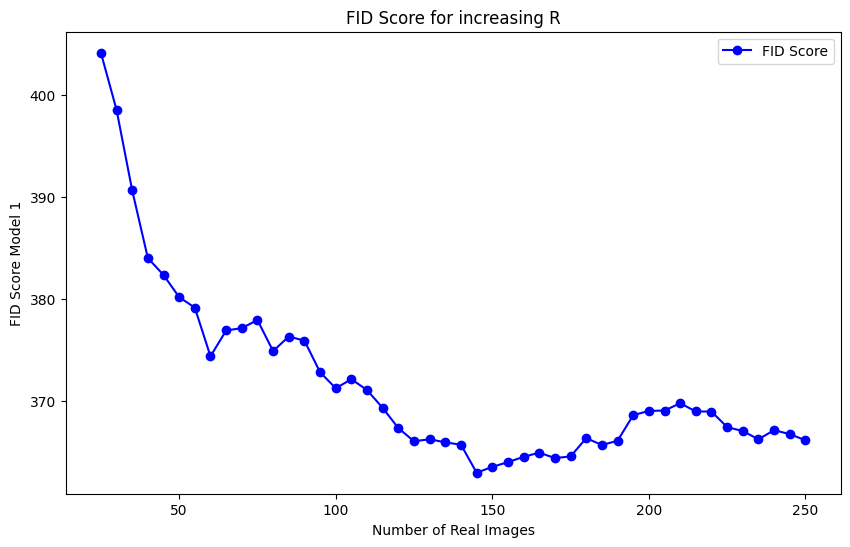

In [ ]:
import matplotlib.pyplot as plt

# Updated function to calculate FID scores iteratively and plot results
def calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25):
    fid_scores = []
    count_values = list(range(start, end + 1, step))

    for count_dir1 in count_values:
        print(f"Calculating FID for count_dir1={count_dir1}, count_dir2={count_dir2}...")
        fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
        fid_scores.append(fid_score)
        print(f"FID Score: {fid_score}")

    # Plot the FID scores
    plt.figure(figsize=(10, 6))
    plt.plot(count_values, fid_scores, marker='o', linestyle='-', color='b', label="FID Score")
    plt.xlabel("Number of Real Images")
    plt.ylabel("FID Score Model 1")
    plt.title("FID Score for increasing R")
    # plt.grid(True)
    plt.legend()
    plt.savefig("model1.pdf", dpi=600)
    plt.show()

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_1"

calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25)


### Model 2 iteratively increasing x and then plotting, with step of 5, then we decide the x value and then use it for rest analysis

Calculating FID for count_dir1=25, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp60_oz1j0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpgf5c93jn" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 348.940318857308


FID Score: 348.940318857308
Calculating FID for count_dir1=30, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp96ch6j57" with extensions png,jpg,jpeg
Found 30 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp38n46bfr" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.72652552624936


FID Score: 342.72652552624936
Calculating FID for count_dir1=35, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp_orp2yx_" with extensions png,jpg,jpeg
Found 35 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp6uq5ms4z" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 336.5406264215843


FID Score: 336.5406264215843
Calculating FID for count_dir1=40, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmplxt0a_uk" with extensions png,jpg,jpeg
Found 40 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpgfyb0a6f" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 330.2825913466455


FID Score: 330.2825913466455
Calculating FID for count_dir1=45, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpag60dd71" with extensions png,jpg,jpeg
Found 45 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp5n2pgmpd" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 330.1717221237956


FID Score: 330.1717221237956
Calculating FID for count_dir1=50, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmptj1kjub8" with extensions png,jpg,jpeg
Found 50 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp4jtlzra5" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 327.1531696951532


FID Score: 327.1531696951532
Calculating FID for count_dir1=55, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpp1tav3_4" with extensions png,jpg,jpeg
Found 55 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp9w84tmye" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 324.85287166635214


FID Score: 324.85287166635214
Calculating FID for count_dir1=60, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp7d4sqlcv" with extensions png,jpg,jpeg
Found 60 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmphi796q_p" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 322.09209991019065


FID Score: 322.09209991019065
Calculating FID for count_dir1=65, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp5mtj9v4f" with extensions png,jpg,jpeg
Found 65 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpq0dgtsul" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.46604690791116


FID Score: 323.46604690791116
Calculating FID for count_dir1=70, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmptmz_f0a7" with extensions png,jpg,jpeg
Found 70 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp1hoh0fe7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 324.2126889540498


FID Score: 324.2126889540498
Calculating FID for count_dir1=75, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmphvmcyrhu" with extensions png,jpg,jpeg
Found 75 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpn6fhocpn" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.7066036055611


FID Score: 323.7066036055611
Calculating FID for count_dir1=80, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp88pcnu03" with extensions png,jpg,jpeg
Found 80 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmphb2hr9x3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.8964886877234


FID Score: 320.8964886877234
Calculating FID for count_dir1=85, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp13f8cqvq" with extensions png,jpg,jpeg
Found 85 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp0doj9j9u" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.1173655327685


FID Score: 323.1173655327685
Calculating FID for count_dir1=90, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpm817kidl" with extensions png,jpg,jpeg
Found 90 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpc3nkrbxa" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 322.9807524311237


FID Score: 322.9807524311237
Calculating FID for count_dir1=95, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmps4z50oz6" with extensions png,jpg,jpeg
Found 95 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpx09bvip7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.3413223527805


FID Score: 320.3413223527805
Calculating FID for count_dir1=100, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpfx864_wu" with extensions png,jpg,jpeg
Found 100 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpjsrzisv9" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 318.37344124418496


FID Score: 318.37344124418496
Calculating FID for count_dir1=105, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp4oqah9r2" with extensions png,jpg,jpeg
Found 105 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpryss6rf8" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 319.02836053800087


FID Score: 319.02836053800087
Calculating FID for count_dir1=110, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmprj_9x9l6" with extensions png,jpg,jpeg
Found 110 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpxwddasm4" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 317.7123106639316


FID Score: 317.7123106639316
Calculating FID for count_dir1=115, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpaahhuk29" with extensions png,jpg,jpeg
Found 115 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpx13v7wy5" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 316.53205790420134


FID Score: 316.53205790420134
Calculating FID for count_dir1=120, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpjxjsg3v7" with extensions png,jpg,jpeg
Found 120 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp_7nka91u" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.9374950746263


FID Score: 314.9374950746263
Calculating FID for count_dir1=125, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpo6yf474u" with extensions png,jpg,jpeg
Found 125 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpbyubcojm" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.05584230027773


FID Score: 314.05584230027773
Calculating FID for count_dir1=130, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp2yi6j8f8" with extensions png,jpg,jpeg
Found 130 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpuekqz2xx" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.60760129395817


FID Score: 313.60760129395817
Calculating FID for count_dir1=135, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp8vj1i7y0" with extensions png,jpg,jpeg
Found 135 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp9e632b77" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.84792325420926


FID Score: 313.84792325420926
Calculating FID for count_dir1=140, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpnixqf3nt" with extensions png,jpg,jpeg
Found 140 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpu79z5kxf" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.01122083238596


FID Score: 314.01122083238596
Calculating FID for count_dir1=145, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpn1o529m2" with extensions png,jpg,jpeg
Found 145 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp5zinp7y8" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 312.14393830634583


FID Score: 312.14393830634583
Calculating FID for count_dir1=150, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp98idgfj0" with extensions png,jpg,jpeg
Found 150 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp_sb321wp" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 312.64601099302536


FID Score: 312.64601099302536
Calculating FID for count_dir1=155, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpcn3ggalw" with extensions png,jpg,jpeg
Found 155 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpylh0r_5s" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 312.75310075456713


FID Score: 312.75310075456713
Calculating FID for count_dir1=160, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpaaoat3yn" with extensions png,jpg,jpeg
Found 160 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp_ibcuzmc" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.5923582014341


FID Score: 313.5923582014341
Calculating FID for count_dir1=165, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpf1clw1dg" with extensions png,jpg,jpeg
Found 165 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpj7hxht1d" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.0320034467783


FID Score: 314.0320034467783
Calculating FID for count_dir1=170, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmprvqijilq" with extensions png,jpg,jpeg
Found 170 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpv2bvmt3j" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.36465494364256


FID Score: 313.36465494364256
Calculating FID for count_dir1=175, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpe946sayv" with extensions png,jpg,jpeg
Found 175 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpswq4zebh" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 312.8827058681878


FID Score: 312.8827058681878
Calculating FID for count_dir1=180, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmptyamcl33" with extensions png,jpg,jpeg
Found 180 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpg1n40qbh" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.91405086611553


FID Score: 313.91405086611553
Calculating FID for count_dir1=185, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpy_66vxok" with extensions png,jpg,jpeg
Found 185 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp466qkr35" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.5240897291642


FID Score: 313.5240897291642
Calculating FID for count_dir1=190, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp769eluzt" with extensions png,jpg,jpeg
Found 190 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpbslpxshn" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.6083291470992


FID Score: 313.6083291470992
Calculating FID for count_dir1=195, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmprvtsv9tv" with extensions png,jpg,jpeg
Found 195 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmps9aw75wg" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 315.6059491547077


FID Score: 315.6059491547077
Calculating FID for count_dir1=200, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpcz91tigf" with extensions png,jpg,jpeg
Found 200 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpn7tkkt11" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 316.1344767166298


FID Score: 316.1344767166298
Calculating FID for count_dir1=205, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpin2ss7hw" with extensions png,jpg,jpeg
Found 205 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpzmpjtdb3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 316.0623613906705


FID Score: 316.0623613906705
Calculating FID for count_dir1=210, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp5vu183r8" with extensions png,jpg,jpeg
Found 210 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpt0nobaks" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 316.3029803315071


FID Score: 316.3029803315071
Calculating FID for count_dir1=215, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpagnothbg" with extensions png,jpg,jpeg
Found 215 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpg4k5oga6" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 315.9746993302605


FID Score: 315.9746993302605
Calculating FID for count_dir1=220, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp9g706byb" with extensions png,jpg,jpeg
Found 220 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp8gdgpzh4" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 315.8233303294746


FID Score: 315.8233303294746
Calculating FID for count_dir1=225, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp7s0ay98s" with extensions png,jpg,jpeg
Found 225 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpcl40ffw7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.81792433899426


FID Score: 314.81792433899426
Calculating FID for count_dir1=230, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmptu71ouez" with extensions png,jpg,jpeg
Found 230 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp15pukps4" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.2079495949314


FID Score: 314.2079495949314
Calculating FID for count_dir1=235, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp2oaphjp4" with extensions png,jpg,jpeg
Found 235 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpnqc9bwsq" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.7204376979462


FID Score: 313.7204376979462
Calculating FID for count_dir1=240, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpg7choqnn" with extensions png,jpg,jpeg
Found 240 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp8qkm39ov" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.452195411138


FID Score: 314.452195411138
Calculating FID for count_dir1=245, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp4uufh5tv" with extensions png,jpg,jpeg
Found 245 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpq9pcgwfw" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 314.15021231792366


FID Score: 314.15021231792366
Calculating FID for count_dir1=250, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpdu8wk2qw" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp5b08mibg" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 313.87200051875163


FID Score: 313.87200051875163


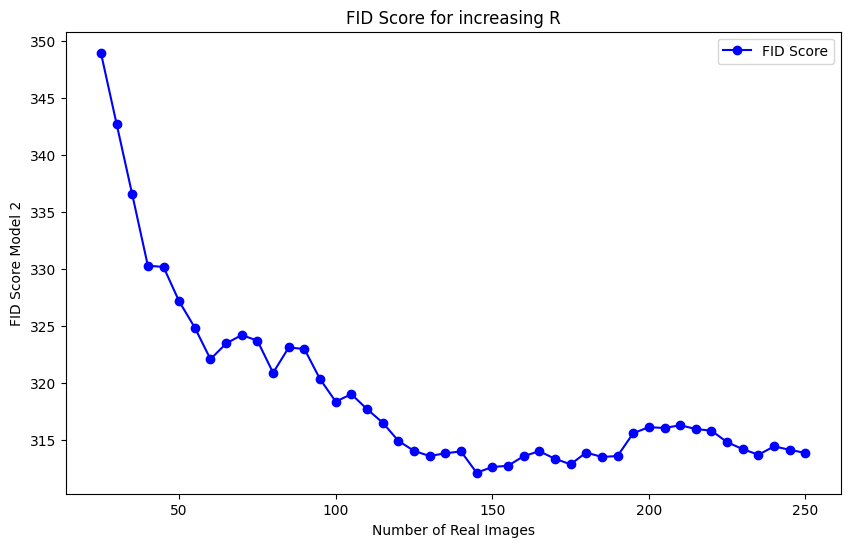

In [ ]:
import matplotlib.pyplot as plt

# Updated function to calculate FID scores iteratively and plot results
def calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25):
    fid_scores = []
    count_values = list(range(start, end + 1, step))

    for count_dir1 in count_values:
        print(f"Calculating FID for count_dir1={count_dir1}, count_dir2={count_dir2}...")
        fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
        fid_scores.append(fid_score)
        print(f"FID Score: {fid_score}")

    # Plot the FID scores
    plt.figure(figsize=(10, 6))
    plt.plot(count_values, fid_scores, marker='o', linestyle='-', color='b', label="FID Score")
    plt.xlabel("Number of Real Images")
    plt.ylabel("FID Score Model 2")
    plt.title("FID Score for increasing R")
    # plt.grid(True)
    plt.legend()
    plt.savefig("model2.pdf", dpi=600)
    plt.show()

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_2"

calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25)


### Model 3 iteratively increasing x and then plotting, with step of 5, then we decide the x value and then use it for rest analysis

Calculating FID for count_dir1=25, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp22sub_jc" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpay6pdoec" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 381.2819667008039


FID Score: 381.2819667008039
Calculating FID for count_dir1=30, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp_dx7wwtp" with extensions png,jpg,jpeg
Found 30 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpvz508vzr" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 374.09650752041284


FID Score: 374.09650752041284
Calculating FID for count_dir1=35, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpd95bnr8r" with extensions png,jpg,jpeg
Found 35 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpqpv58zox" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 366.9734885139202


FID Score: 366.9734885139202
Calculating FID for count_dir1=40, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpxoglxi0y" with extensions png,jpg,jpeg
Found 40 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmplc0pm_2z" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 360.7225921229983


FID Score: 360.7225921229983
Calculating FID for count_dir1=45, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpqp5rhg0s" with extensions png,jpg,jpeg
Found 45 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp1hmmnzfy" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 359.4389288080223


FID Score: 359.4389288080223
Calculating FID for count_dir1=50, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpqh3lm8bp" with extensions png,jpg,jpeg
Found 50 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpljr21zh0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 357.6121306818067


FID Score: 357.6121306818067
Calculating FID for count_dir1=55, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmppw7ldyiz" with extensions png,jpg,jpeg
Found 55 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp4l4zwkg7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 356.728755820076


FID Score: 356.728755820076
Calculating FID for count_dir1=60, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpzelkh627" with extensions png,jpg,jpeg
Found 60 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpo_ziy1d7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 353.26015614918356


FID Score: 353.26015614918356
Calculating FID for count_dir1=65, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp_f0iyvod" with extensions png,jpg,jpeg
Found 65 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp0qxetny6" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 354.84859742012094


FID Score: 354.84859742012094
Calculating FID for count_dir1=70, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpitdi9id1" with extensions png,jpg,jpeg
Found 70 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpf5lydk54" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 354.9946810586373


FID Score: 354.9946810586373
Calculating FID for count_dir1=75, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpj6scoiv6" with extensions png,jpg,jpeg
Found 75 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp7wco5hux" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 354.58593121926367


FID Score: 354.58593121926367
Calculating FID for count_dir1=80, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpodeh7v_z" with extensions png,jpg,jpeg
Found 80 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp45e49fjs" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 351.8787640856506


FID Score: 351.8787640856506
Calculating FID for count_dir1=85, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp61y6bza5" with extensions png,jpg,jpeg
Found 85 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpfsfjcq81" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 353.68971814117765


FID Score: 353.68971814117765
Calculating FID for count_dir1=90, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpgdlt_8cr" with extensions png,jpg,jpeg
Found 90 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpvis25axh" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 353.65910745437907


FID Score: 353.65910745437907
Calculating FID for count_dir1=95, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp8bo69mg2" with extensions png,jpg,jpeg
Found 95 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp6kx04e63" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 350.5738853564152


FID Score: 350.5738853564152
Calculating FID for count_dir1=100, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpug0uo5az" with extensions png,jpg,jpeg
Found 100 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp3y1sh9me" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 349.00417464503846


FID Score: 349.00417464503846
Calculating FID for count_dir1=105, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp_30sq098" with extensions png,jpg,jpeg
Found 105 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp8s81coyr" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 349.92546266370266


FID Score: 349.92546266370266
Calculating FID for count_dir1=110, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp0r3mnxi0" with extensions png,jpg,jpeg
Found 110 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpjahzfsai" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 348.9006688843243


FID Score: 348.9006688843243
Calculating FID for count_dir1=115, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp41r300zf" with extensions png,jpg,jpeg
Found 115 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpfbdq6h02" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 347.3170663123694


FID Score: 347.3170663123694
Calculating FID for count_dir1=120, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpxa95f36_" with extensions png,jpg,jpeg
Found 120 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpkegouk4o" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 345.30138907384975


FID Score: 345.30138907384975
Calculating FID for count_dir1=125, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpika_0rhl" with extensions png,jpg,jpeg
Found 125 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp7_ukcs7z" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.31171388755024


FID Score: 344.31171388755024
Calculating FID for count_dir1=130, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpkdoaq66s" with extensions png,jpg,jpeg
Found 130 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmplajv1whr" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.3985141043026


FID Score: 344.3985141043026
Calculating FID for count_dir1=135, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpywuvorgo" with extensions png,jpg,jpeg
Found 135 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp2faqanup" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.2484932712552


FID Score: 344.2484932712552
Calculating FID for count_dir1=140, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpw2lfh4zd" with extensions png,jpg,jpeg
Found 140 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpi_j4aatw" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.1510559203681


FID Score: 344.1510559203681
Calculating FID for count_dir1=145, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpqb8k8lzi" with extensions png,jpg,jpeg
Found 145 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmph447v13y" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 341.9236130255483


FID Score: 341.9236130255483
Calculating FID for count_dir1=150, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmprjuv1bj_" with extensions png,jpg,jpeg
Found 150 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpnhgou684" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 341.7244846616785


FID Score: 341.7244846616785
Calculating FID for count_dir1=155, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpht2bzmrt" with extensions png,jpg,jpeg
Found 155 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpln5lj9e7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.039644972858


FID Score: 342.039644972858
Calculating FID for count_dir1=160, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpb5b9s9aw" with extensions png,jpg,jpeg
Found 160 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp88j73y9_" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.6214912394822


FID Score: 342.6214912394822
Calculating FID for count_dir1=165, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp7ybkz278" with extensions png,jpg,jpeg
Found 165 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmphh12noqw" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 343.1452122941018


FID Score: 343.1452122941018
Calculating FID for count_dir1=170, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp8o_wtwkm" with extensions png,jpg,jpeg
Found 170 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp2gaqoohp" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.90878229908054


FID Score: 342.90878229908054
Calculating FID for count_dir1=175, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpnxx02xsy" with extensions png,jpg,jpeg
Found 175 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpj96eul1e" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.9022009913717


FID Score: 342.9022009913717
Calculating FID for count_dir1=180, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp3y57s5ff" with extensions png,jpg,jpeg
Found 180 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp7kyje268" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.4841429946369


FID Score: 344.4841429946369
Calculating FID for count_dir1=185, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmplnvq_j7x" with extensions png,jpg,jpeg
Found 185 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp7xw_o9ok" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 343.83132089448657


FID Score: 343.83132089448657
Calculating FID for count_dir1=190, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpoudr2lf9" with extensions png,jpg,jpeg
Found 190 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmph8ysu4qw" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.06143441221434


FID Score: 344.06143441221434
Calculating FID for count_dir1=195, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpv7uwfhli" with extensions png,jpg,jpeg
Found 195 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp1yclox9g" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 346.4360575520439


FID Score: 346.4360575520439
Calculating FID for count_dir1=200, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpk6fofwp6" with extensions png,jpg,jpeg
Found 200 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpj63oijen" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 346.4926739806085


FID Score: 346.4926739806085
Calculating FID for count_dir1=205, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpgnfzr678" with extensions png,jpg,jpeg
Found 205 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpvvjub9b6" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 346.45515075313176


FID Score: 346.45515075313176
Calculating FID for count_dir1=210, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp4d6agbo3" with extensions png,jpg,jpeg
Found 210 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpejbmkfgt" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 346.9059710941568


FID Score: 346.9059710941568
Calculating FID for count_dir1=215, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpsrck7z84" with extensions png,jpg,jpeg
Found 215 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpn4wq3wxz" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 346.22062903119956


FID Score: 346.22062903119956
Calculating FID for count_dir1=220, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpeoj1ojd7" with extensions png,jpg,jpeg
Found 220 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpnjhjuduj" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 345.78165132407815


FID Score: 345.78165132407815
Calculating FID for count_dir1=225, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpof4sc6y0" with extensions png,jpg,jpeg
Found 225 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmphlxskm09" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.31918726126145


FID Score: 344.31918726126145
Calculating FID for count_dir1=230, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpgkn9po87" with extensions png,jpg,jpeg
Found 230 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpwqnk2ffp" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 343.692077766199


FID Score: 343.692077766199
Calculating FID for count_dir1=235, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpe3bprhza" with extensions png,jpg,jpeg
Found 235 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpwhe2jsiz" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 343.32347683469584


FID Score: 343.32347683469584
Calculating FID for count_dir1=240, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp1uwzehl7" with extensions png,jpg,jpeg
Found 240 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp_d_aazgd" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 344.0591698628101


FID Score: 344.0591698628101
Calculating FID for count_dir1=245, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmphy271dpc" with extensions png,jpg,jpeg
Found 245 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpsa20renk" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 343.74155296034223


FID Score: 343.74155296034223
Calculating FID for count_dir1=250, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpbwa7sv29" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp_oafrd3w" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 343.2283188875826


FID Score: 343.2283188875826


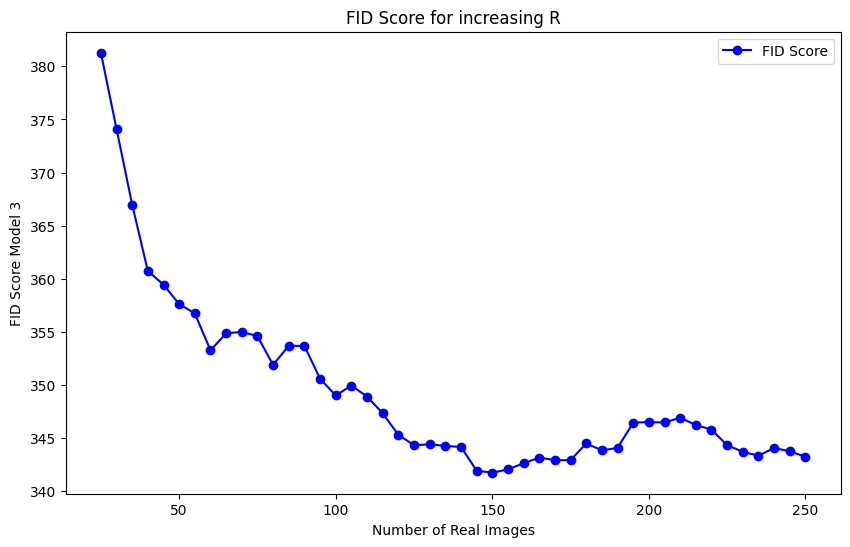

In [ ]:
import matplotlib.pyplot as plt

# Updated function to calculate FID scores iteratively and plot results
def calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25):
    fid_scores = []
    count_values = list(range(start, end + 1, step))

    for count_dir1 in count_values:
        print(f"Calculating FID for count_dir1={count_dir1}, count_dir2={count_dir2}...")
        fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
        fid_scores.append(fid_score)
        print(f"FID Score: {fid_score}")

    # Plot the FID scores
    plt.figure(figsize=(10, 6))
    plt.plot(count_values, fid_scores, marker='o', linestyle='-', color='b', label="FID Score")
    plt.xlabel("Number of Real Images")
    plt.ylabel("FID Score Model 3")
    plt.title("FID Score for increasing R")
    # plt.grid(True)
    plt.legend()
    plt.savefig("model3.pdf", dpi=600)
    plt.show()

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_3"

calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25)


### Model 4 iteratively increasing x and then plotting, with step of 5, then we decide the x value and then use it for rest analysis

Calculating FID for count_dir1=25, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpzn17371m" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp38ry4wtv" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 358.0616948722377


FID Score: 358.0616948722377
Calculating FID for count_dir1=30, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp8w_x9gc2" with extensions png,jpg,jpeg
Found 30 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpznwly4ps" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 349.9635691068204


FID Score: 349.9635691068204
Calculating FID for count_dir1=35, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpi_kcml_q" with extensions png,jpg,jpeg
Found 35 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmplwo8vqz7" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 342.6895629245859


FID Score: 342.6895629245859
Calculating FID for count_dir1=40, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmphzqoebft" with extensions png,jpg,jpeg
Found 40 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpuq8g4adq" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 336.33830752662254


FID Score: 336.33830752662254
Calculating FID for count_dir1=45, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp82gyenfp" with extensions png,jpg,jpeg
Found 45 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpqq_f3gef" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 334.3702070250639


FID Score: 334.3702070250639
Calculating FID for count_dir1=50, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpgbltz0ae" with extensions png,jpg,jpeg
Found 50 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpiz9t_zfi" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 332.6096554766938


FID Score: 332.6096554766938
Calculating FID for count_dir1=55, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp5z6x0h4o" with extensions png,jpg,jpeg
Found 55 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpu1who1z8" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 332.0908423222294


FID Score: 332.0908423222294
Calculating FID for count_dir1=60, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpcjnupvwu" with extensions png,jpg,jpeg
Found 60 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpo9a4hs5u" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 329.54631786520997


FID Score: 329.54631786520997
Calculating FID for count_dir1=65, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpui7rq3tn" with extensions png,jpg,jpeg
Found 65 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpc5texp8y" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 331.31916130736886


FID Score: 331.31916130736886
Calculating FID for count_dir1=70, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpn9wjko4v" with extensions png,jpg,jpeg
Found 70 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpj_x97znl" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 331.96651610741964


FID Score: 331.96651610741964
Calculating FID for count_dir1=75, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpn0ejk6tp" with extensions png,jpg,jpeg
Found 75 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpyc1wc7yx" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 332.0168191371607


FID Score: 332.0168191371607
Calculating FID for count_dir1=80, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpfgaqfg62" with extensions png,jpg,jpeg
Found 80 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp0wpub98y" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 329.26437947837053


FID Score: 329.26437947837053
Calculating FID for count_dir1=85, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpccjz_krr" with extensions png,jpg,jpeg
Found 85 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpy1fnm2m0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 331.64814856792134


FID Score: 331.64814856792134
Calculating FID for count_dir1=90, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmplgary8le" with extensions png,jpg,jpeg
Found 90 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpxs48q0sh" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 331.3569801373071


FID Score: 331.3569801373071
Calculating FID for count_dir1=95, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmph_xz6y4r" with extensions png,jpg,jpeg
Found 95 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp1balca63" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 328.41844882076066


FID Score: 328.41844882076066
Calculating FID for count_dir1=100, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmphtr41cre" with extensions png,jpg,jpeg
Found 100 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpad0rrryt" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 326.7781518698504


FID Score: 326.7781518698504
Calculating FID for count_dir1=105, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpyd2r0_9j" with extensions png,jpg,jpeg
Found 105 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpvxay6att" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 327.29650746972357


FID Score: 327.29650746972357
Calculating FID for count_dir1=110, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpnfhxtt16" with extensions png,jpg,jpeg
Found 110 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpinjv162g" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 325.3142108739051


FID Score: 325.3142108739051
Calculating FID for count_dir1=115, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpc2tc4i4l" with extensions png,jpg,jpeg
Found 115 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpzk6mar2h" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.7559114749788


FID Score: 323.7559114749788
Calculating FID for count_dir1=120, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp1fk58c0f" with extensions png,jpg,jpeg
Found 120 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpwxz2gl9n" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 322.2397106389884


FID Score: 322.2397106389884
Calculating FID for count_dir1=125, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpmy5qbxv7" with extensions png,jpg,jpeg
Found 125 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp3qigmsla" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.50541576198634


FID Score: 321.50541576198634
Calculating FID for count_dir1=130, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp7kaiqtkn" with extensions png,jpg,jpeg
Found 130 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp98j2_6no" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.0911979558083


FID Score: 321.0911979558083
Calculating FID for count_dir1=135, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpz_k9c4re" with extensions png,jpg,jpeg
Found 135 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpgaoapms3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.47449348087713


FID Score: 321.47449348087713
Calculating FID for count_dir1=140, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp672iwpo3" with extensions png,jpg,jpeg
Found 140 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpnp_6__p6" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.79821703839616


FID Score: 321.79821703839616
Calculating FID for count_dir1=145, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpjw4hpfel" with extensions png,jpg,jpeg
Found 145 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmptp9y9vqq" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 319.47341893130726


FID Score: 319.47341893130726
Calculating FID for count_dir1=150, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmprhyd1xjs" with extensions png,jpg,jpeg
Found 150 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpoau0vzlt" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 319.929023237779


FID Score: 319.929023237779
Calculating FID for count_dir1=155, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpd29zkgyw" with extensions png,jpg,jpeg
Found 155 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp67d6ers0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.31186409412754


FID Score: 320.31186409412754
Calculating FID for count_dir1=160, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp9sk0mph_" with extensions png,jpg,jpeg
Found 160 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpl459txtv" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.6340055779742


FID Score: 320.6340055779742
Calculating FID for count_dir1=165, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpxxb_khva" with extensions png,jpg,jpeg
Found 165 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp8xpy170f" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.896025606521


FID Score: 320.896025606521
Calculating FID for count_dir1=170, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp51c_5n_3" with extensions png,jpg,jpeg
Found 170 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpqo7wlui3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.4946020284575


FID Score: 320.4946020284575
Calculating FID for count_dir1=175, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpe9i3_poe" with extensions png,jpg,jpeg
Found 175 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmph0dmetyz" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.2879219682778


FID Score: 320.2879219682778
Calculating FID for count_dir1=180, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpw50hlh4p" with extensions png,jpg,jpeg
Found 180 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpkmpeu31s" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.9221980459139


FID Score: 320.9221980459139
Calculating FID for count_dir1=185, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpihz6mig9" with extensions png,jpg,jpeg
Found 185 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpr8w32r1u" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.4253055281134


FID Score: 320.4253055281134
Calculating FID for count_dir1=190, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpfzzw8pqf" with extensions png,jpg,jpeg
Found 190 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpz0hr5ut0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 320.65990600306395


FID Score: 320.65990600306395
Calculating FID for count_dir1=195, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp2zwv4942" with extensions png,jpg,jpeg
Found 195 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpeaxypcw5" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 322.87425734770926


FID Score: 322.87425734770926
Calculating FID for count_dir1=200, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmprboo0pe1" with extensions png,jpg,jpeg
Found 200 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpuju589fm" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.14434489561006


FID Score: 323.14434489561006
Calculating FID for count_dir1=205, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmptczz7t2f" with extensions png,jpg,jpeg
Found 205 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp8thiwipv" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.2297698999849


FID Score: 323.2297698999849
Calculating FID for count_dir1=210, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmppen65xzu" with extensions png,jpg,jpeg
Found 210 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpmsn90av0" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.92832698841


FID Score: 323.92832698841
Calculating FID for count_dir1=215, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpmcrgo8g5" with extensions png,jpg,jpeg
Found 215 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpc487xt2j" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.5053187617235


FID Score: 323.5053187617235
Calculating FID for count_dir1=220, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp5zf43c0d" with extensions png,jpg,jpeg
Found 220 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp49x_js1_" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 323.56488013041735


FID Score: 323.56488013041735
Calculating FID for count_dir1=225, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpislh_x7m" with extensions png,jpg,jpeg
Found 225 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpg30e1tip" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 322.2692450583521


FID Score: 322.2692450583521
Calculating FID for count_dir1=230, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp8nj1styr" with extensions png,jpg,jpeg
Found 230 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpon7t_agi" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.9175688405088


FID Score: 321.9175688405088
Calculating FID for count_dir1=235, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp5qg4ukiw" with extensions png,jpg,jpeg
Found 235 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmppttaljdd" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.4998587399928


FID Score: 321.4998587399928
Calculating FID for count_dir1=240, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp9etbdxx4" with extensions png,jpg,jpeg
Found 240 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmp93n4x8m1" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 322.1579378620431


FID Score: 322.1579378620431
Calculating FID for count_dir1=245, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmpnqx2pflf" with extensions png,jpg,jpeg
Found 245 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpjghv0lu3" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.6668557443195


FID Score: 321.6668557443195
Calculating FID for count_dir1=250, count_dir2=25...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp7sng91yy" with extensions png,jpg,jpeg
Found 250 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpvyhgqyur" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 321.31048265486913


FID Score: 321.31048265486913


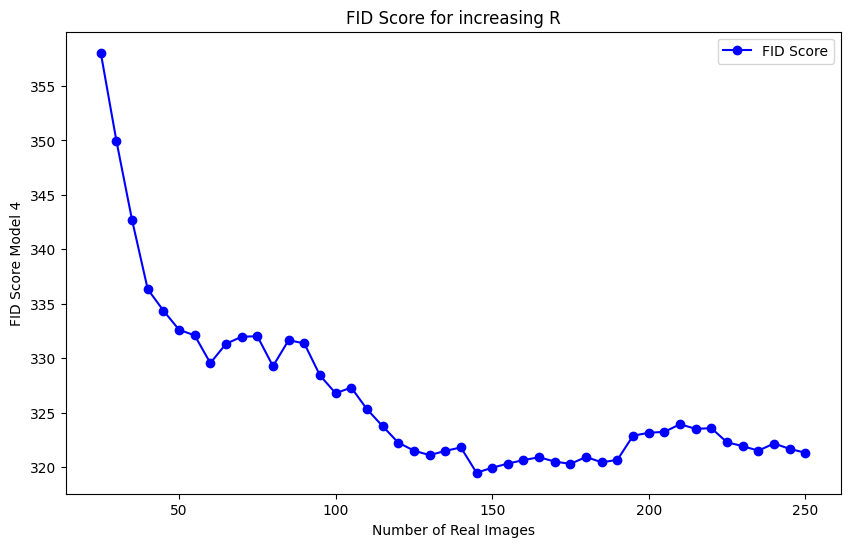

In [ ]:
import matplotlib.pyplot as plt

# Updated function to calculate FID scores iteratively and plot results
def calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25):
    fid_scores = []
    count_values = list(range(start, end + 1, step))

    for count_dir1 in count_values:
        print(f"Calculating FID for count_dir1={count_dir1}, count_dir2={count_dir2}...")
        fid_score = calculate_fid(dir1, dir2, count_dir1=count_dir1, count_dir2=count_dir2)
        fid_scores.append(fid_score)
        print(f"FID Score: {fid_score}")

    # Plot the FID scores
    plt.figure(figsize=(10, 6))
    plt.plot(count_values, fid_scores, marker='o', linestyle='-', color='b', label="FID Score")
    plt.xlabel("Number of Real Images")
    plt.ylabel("FID Score Model 4")
    plt.title("FID Score for increasing R")
    # plt.grid(True)
    plt.legend()
    plt.savefig("model4.pdf", dpi=600)
    plt.show()

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"
dir2 = "/content/drive/MyDrive/Public/samlet_generated_100_256_models/Model_4"

calculate_and_plot_fid_iteratively(dir1, dir2, start=25, end=250, step=5, count_dir2=25)


# 25R with 25 random noise, 25R with 25 random images

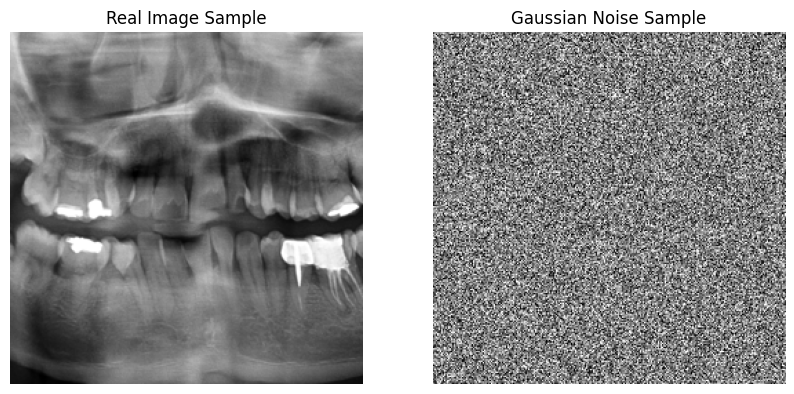

Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp1uy72epn" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpxnhxr1f1" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 655.5371416847473


FID Score with Gaussian Noise: 655.5371416847473


In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

# Function to generate greyish Gaussian noise images with a mean in the middle of the grey value range
# and standard deviation of 1/4 of the grey value range
def generate_greyish_gaussian_noise_images(count, size=(256, 256), mean=128, std=64):
    # Generate noise in a single channel (grayscale)
    noise_images = np.random.normal(mean, std, (count, *size)).clip(0, 255).astype(np.uint8)

    # Convert grayscale noise to RGB by replicating the grayscale values in all channels
    noise_images_rgb = np.stack([noise_images] * 3, axis=-1)

    return noise_images_rgb

# Function to display one sample image from the real images and one sample from the Gaussian noise
def display_samples(real_images_array, noise_images_array):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display one random real image
    real_sample = random.choice(real_images_array)
    axes[0].imshow(real_sample)
    axes[0].set_title("Real Image Sample")
    axes[0].axis('off')

    # Display one random noise image
    noise_sample = random.choice(noise_images_array)
    axes[1].imshow(noise_sample)
    axes[1].set_title("Gaussian Noise Sample")
    axes[1].axis('off')

    plt.show()

def calculate_fid(dir1, count_dir1=None, noise_count=25):
    # Load subsets of images from the real directory
    real_images_array = load_images_from_directory(dir1, count=count_dir1)

    # Generate greyish Gaussian noise images
    noise_images_array = generate_greyish_gaussian_noise_images(noise_count)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    noise_images_tensor = prepare_images(noise_images_array)

    # Display sample images
    display_samples(real_images_array, noise_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as noise_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save noise images to temporary directory
        for i, img in enumerate(noise_images_tensor):
            save_image(img, os.path.join(noise_dir, f"noise_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=noise_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"

# Specify the number of images to use from the real directory
count_dir1 = 2000  # Number of real images to use

fid_score = calculate_fid(dir1, count_dir1=count_dir1, noise_count=25)
print(f"FID Score with Gaussian Noise: {fid_score}")


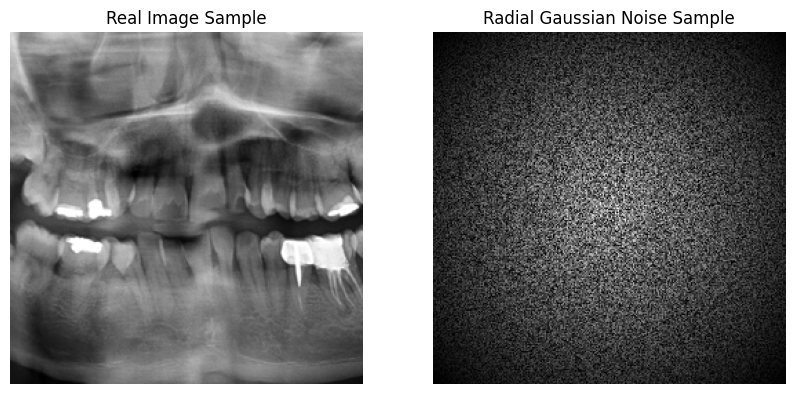

Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/tmp/tmp3f0ko9xj" with extensions png,jpg,jpeg
Found 2000 samples
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/tmp/tmpsuh_vpau" with extensions png,jpg,jpeg
Found 25 samples
Processing samples
Frechet Inception Distance: 602.1904575180187


FID Score with Radial Gaussian Noise: 602.1904575180187


In [ ]:
import torch
from torchvision.utils import save_image
import os
import tempfile
from torch_fidelity import calculate_metrics
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

# Normalize images to [0, 1] and convert to PyTorch tensors
def prepare_images(images):
    return torch.tensor(images).permute(0, 3, 1, 2).float() / 255.0  # [N, H, W, C] -> [N, C, H, W]

# Function to load images from the directory, resize, ensure RGB, and return them as a NumPy array
def load_images_from_directory(directory_path, count=None, target_size=(256, 256), seed=10):
    random.seed(seed)
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

    if count is not None:
        image_files = random.sample(image_files, min(count, len(image_files)))  # Randomly select 'count' images

    images = []
    for filename in image_files:
        file_path = os.path.join(directory_path, filename)
        try:
            img = Image.open(file_path).convert("RGB").resize(target_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return np.array(images)

# Function to generate radial Gaussian noise with intensity decreasing from the center
def generate_radial_gaussian_noise_images(count, size=(256, 256), mean=128, std=64):
    height, width = size
    # Generate the radial distance map (distance from center)
    Y, X = np.ogrid[:height, :width]
    center_x, center_y = width // 2, height // 2
    distance_map = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

    # Normalize the distance map to range [0, 1]
    max_distance = np.max(distance_map)
    distance_map = distance_map / max_distance

    # Create noise for each image
    noise_images = []
    for _ in range(count):
        # Generate Gaussian noise
        noise = np.random.normal(mean, std, (height, width)).clip(0, 255).astype(np.uint8)

        # Apply the radial mask (the further from the center, the darker the image)
        radial_noise = (noise * (1 - distance_map)).clip(0, 255).astype(np.uint8)

        # Convert to RGB by repeating across all channels
        radial_noise_rgb = np.stack([radial_noise] * 3, axis=-1)
        noise_images.append(radial_noise_rgb)

    return np.array(noise_images)

# Function to display one sample image from the real images and one sample from the radial noise
def display_samples(real_images_array, radial_noise_images_array):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display one random real image
    real_sample = random.choice(real_images_array)
    axes[0].imshow(real_sample)
    axes[0].set_title("Real Image Sample")
    axes[0].axis('off')

    # Display one random radial noise image
    noise_sample = random.choice(radial_noise_images_array)
    axes[1].imshow(noise_sample)
    axes[1].set_title("Radial Gaussian Noise Sample")
    axes[1].axis('off')

    plt.show()

def calculate_fid(dir1, count_dir1=None, noise_count=25):
    # Load subsets of images from the real directory
    real_images_array = load_images_from_directory(dir1, count=count_dir1)

    # Generate radial Gaussian noise images
    radial_noise_images_array = generate_radial_gaussian_noise_images(noise_count)

    # Prepare images by normalizing and converting to PyTorch tensors
    real_images_tensor = prepare_images(real_images_array)
    radial_noise_images_tensor = prepare_images(radial_noise_images_array)

    # Display sample images
    display_samples(real_images_array, radial_noise_images_array)

    # Use temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as noise_dir:
        # Save real images to temporary directory
        for i, img in enumerate(real_images_tensor):
            save_image(img, os.path.join(real_dir, f"real_{i:05d}.png"))
        # Save noise images to temporary directory
        for i, img in enumerate(radial_noise_images_tensor):
            save_image(img, os.path.join(noise_dir, f"noise_{i:05d}.png"))

        # Calculate FID score using torch_fidelity
        metrics = calculate_metrics(
            input1=real_dir,
            input2=noise_dir,
            fid=True,
            verbose=True
        )

        fid_score = metrics['frechet_inception_distance']

    return fid_score

# Example usage
dir1 = "/content/drive/MyDrive/Public/samlet_greyscale_cropped_2322_256"

# Specify the number of images to use from the real directory
count_dir1 = 2000  # Number of real images to use

fid_score = calculate_fid(dir1, count_dir1=count_dir1, noise_count=25)
print(f"FID Score with Radial Gaussian Noise: {fid_score}")
